### Preprocessing h-indices with transformers.py using data from year 2000 onwards

##### Outcome: data_export.csv -> shortened version of 2017-2024 paper data with prediction labels

In [1]:
import pandas as pd
from tqdm import tqdm
import os
from transformers import DataTransformer
import matplotlib.pyplot as plt

transformer = DataTransformer()

In [2]:
file1 = "all_papers_labeled_2017_2018.csv"
file2 = "all_papers_labeled_2019_2021.csv"
file3 = "all_papers_labeled_2022_2024.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

df = pd.concat([df1, df2, df3], ignore_index=True)

In [3]:
def preprocess_and_transform(data_folder, current_df):

    # read all historical CSV files
    all_files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith('.csv')]
    historical_data_list = []
    for file in tqdm(all_files):
        df = pd.read_csv(file, encoding='ISO-8859-1', low_memory=False)
        historical_data_list.append(df)

    historical_data = pd.concat(historical_data_list, ignore_index=True)

    # append labeled data to historical data
    full_data = pd.concat([historical_data, current_df], ignore_index=True)

    full_data.sort_values(by=["predicted_category"], ascending=False).drop_duplicates(subset="doi", keep="first")
    # full_data = prioritize_predicted_category(full_data)
    transformer = DataTransformer()
    transformed_data = transformer.transform(full_data)

    # remove historical data, keep only the ones where predictions have been made
    transformed_data = transformed_data[transformed_data["predicted_category"].notna()]

    return transformed_data

# path to the historical data folder (files like new_papers_to_annotate_2000_to_2004.csv)
data_folder = "data"

final_df = preprocess_and_transform(data_folder, df)

100%|██████████| 8/8 [00:17<00:00,  2.17s/it]


In [6]:
columns_to_export = [
    "id", "doi", "title", "relevance_score", "publication_year", "publication_date",
    "language", "type", "type_crossref", "indexed_in", "countries_distinct_count",
    "referenced_works_count", "cited_by_count", "predicted_category", "authors", "institutions",
    "countries", "journal_name", "author_h_index", "journal_h_index", "institution_h_index",
    "num_authors", "num_institutions"
]

final_df_filtered = final_df[columns_to_export]
final_df_filtered.to_csv("data_export.csv", index=False)

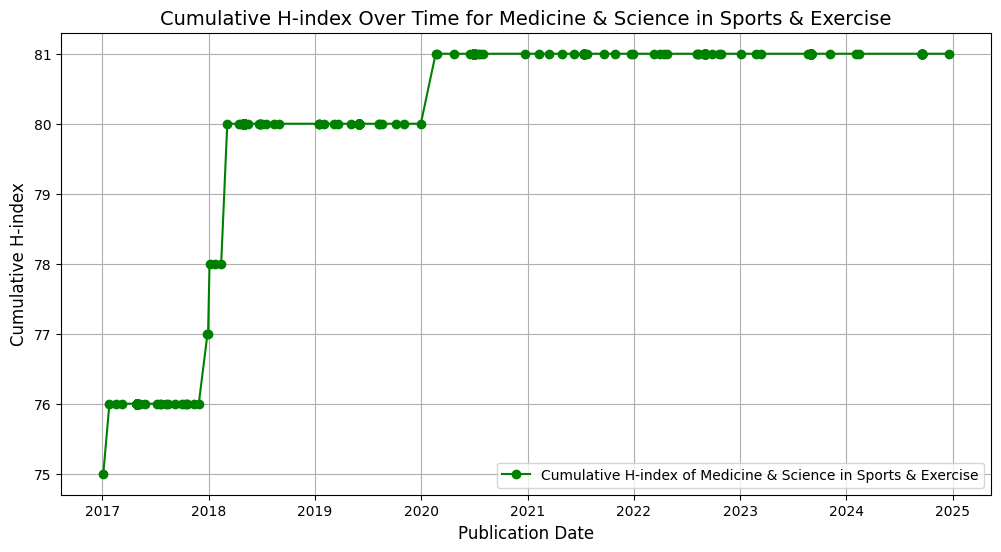

In [4]:
top_journal = final_df["journal_name"].value_counts().idxmax() #journal with most papers
journal_data = final_df[final_df["journal_name"] == top_journal]
plt.figure(figsize=(12, 6))
plt.plot(journal_data["publication_date"], journal_data["journal_h_index"], label=f"Cumulative H-index of {top_journal}", marker="o", color="green")
plt.title(f"Cumulative H-index Over Time for {top_journal}", fontsize=14)
plt.xlabel("Publication Date", fontsize=12)
plt.ylabel("Cumulative H-index", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

/var/folders/66/n03tnlzs0fd6bhjtzdb8ztwm0000gn/T/ipykernel_9781/4277768621.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_data["cumulative_h_index"] = author_data["author_h_index"].cummax()


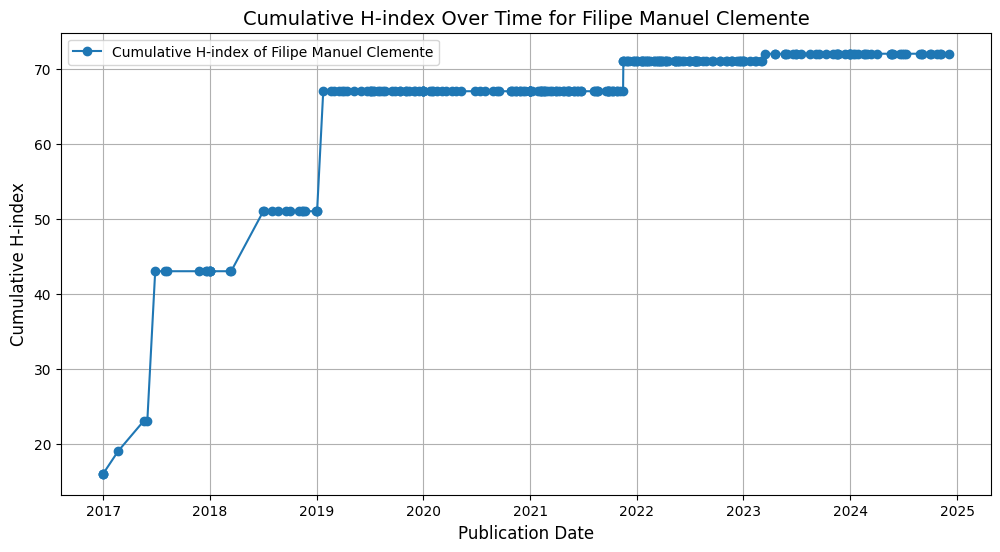

In [7]:
author_name = "Filipe Manuel Clemente"
author_data = final_df[final_df["authors"].apply(lambda x: author_name in x)]
author_data["cumulative_h_index"] = author_data["author_h_index"].cummax()

plt.figure(figsize=(12, 6))
plt.plot(author_data["publication_date"], author_data["cumulative_h_index"], label=f"Cumulative H-index of {author_name}", marker="o")
plt.title(f"Cumulative H-index Over Time for {author_name}", fontsize=14)
plt.xlabel("Publication Date", fontsize=12)
plt.ylabel("Cumulative H-index", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
